# Heart Disease Prediction.

In [67]:
# Importing the packages needed for the logistic regression model
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np


In [86]:
#Providing file, to use in ML model.
heart_disease = pd.read_csv('heart_disease.csv')
heart_disease #Shows first five rows of the heart_disease csv file.


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [106]:
#Fitting a Generalized Linear Model(GLM) to a dataset 'heart_disease' with the response variable,
#'AHD' and a predictor variable 'Age'.
model = sm.GLM.from_formula("AHD ~ Age", family = sm.families.Binomial(), data=heart_disease)
#Fitting GLM to the data.
result = model.fit()
#Estimating the coefficients of predector variables, the standard errors, the p-values, and the goodness-of-fit statistics 
#such as the deviance and the Akaike Information Criterion (AIC).

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                    
===================================================================================
Dep. Variable:     ['AHD[No]', 'AHD[Yes]']   No. Observations:                  303
Model:                                 GLM   Df Residuals:                      301
Model Family:                     Binomial   Df Model:                            1
Link Function:                       Logit   Scale:                          1.0000
Method:                               IRLS   Log-Likelihood:                -201.27
Date:                     Sat, 29 Apr 2023   Deviance:                       402.54
Time:                             23:07:59   Pearson chi2:                     303.
No. Iterations:                          4   Pseudo R-squ. (CS):            0.04970
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0059      0.759      3.960      0.000       1.518       4.494
Age           -0.0520      0.014     -3.803      0.000      -0.079      -0.025
==============================================================================
"""

In [88]:
#Checing the proportion of the males and females having heart disease in the dataset.

#Creating new column in the datafram by replacing the values of '1' and '0' in 'Sex' variable, with corresponding values as 'Male' and 'Female'

heart_disease["Sex1"] = heart_disease.Sex.replace({1: "Male", 0: "Female"})

#Creating cross-tabulation of two variables 'Sex1' and 'AHD' in the dataframe, to show the frequency of counts of each combination of the two variables.
cross_table = pd.crosstab(heart_disease.Sex1, heart_disease.AHD)
#Normalizing counts in each row of the cross-tabulation.
cross_table = cross_table.apply(lambda row: row/row.sum(), axis=1)
#printing the table.
cross_table

AHD,No,Yes
Sex1,,
Female,0.742268,0.257732
Male,0.446602,0.553398


In [89]:
#Odds of heart disease for males and females.
cross_table["Odds"] = cross_table.loc[:, 'Yes'] / cross_table.loc[:, 'No']
cross_table

AHD,No,Yes,Odds
Sex1,,,
Female,0.742268,0.257732,0.347222
Male,0.446602,0.553398,1.239130


In [90]:
#Calculating the log-odds for the cross_table
cross_table['logodds'] = np.log(cross_table.Odds)
cross_table

AHD,No,Yes,Odds,logodds
Sex1,,,,
Female,0.742268,0.257732,0.347222,-1.05779
Male,0.446602,0.553398,1.239130,0.21441


In [91]:
#Fitting a Generalized Linear Model(GLM) to a dataset 'heart_disease' with the response variable,
#'AHD' and a predictor variable 'Sex1'.
model = sm.GLM.from_formula("AHD ~ Sex1", family = sm.families.Binomial(), data=heart_disease)
#Fitting GLM to the data.
result = model.fit()
#Estimating the coefficients of predector variables, the standard errors, the p-values, and the goodness-of-fit statistics 
#such as the deviance and the Akaike Information Criterion (AIC).

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                    
===================================================================================
Dep. Variable:     ['AHD[No]', 'AHD[Yes]']   No. Observations:                  303
Model:                                 GLM   Df Residuals:                      301
Model Family:                     Binomial   Df Model:                            1
Link Function:                       Logit   Scale:                          1.0000
Method:                               IRLS   Log-Likelihood:                -196.97
Date:                     Sat, 29 Apr 2023   Deviance:                       393.93
Time:                             23:03:32   Pearson chi2:                     303.
No. Iterations:                          4   Pseudo R-squ. (CS):            0.07630
Covariance Type:                 nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.0578      0.232      4.557      0.000       0.603       1.513
Sex1[T.Male]    -1.2722      0.271     -4.692      0.000      -1.804      -0.741
================================================================================
"""

In [92]:
#The logistic regression coeffiecient of males is,
cross_table.logodds.Male - cross_table.logodds.Female

1.27220016549331

In [93]:
# A logistic regression Model with 3 Covariates

#Fitting a Generalized Linear Model(GLM) to a dataset 'heart_disease' with the response variable,
#'AHD' and a predictor variable 'Age' and 'Sex1'.
#Specifying that the dependent variable ('AHD') is regressed on two independent variables ('Age' and 'Sex1').
model = sm.GLM.from_formula("AHD ~ Age + Sex1", family = sm.families.Binomial(), data=heart_disease)

#Fitting GLM to the data.
result = model.fit()
#Estimating the coefficients of predector variables, the standard errors, the p-values, and the goodness-of-fit statistics 
#such as the deviance and the Akaike Information Criterion (AIC).

result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                    
===================================================================================
Dep. Variable:     ['AHD[No]', 'AHD[Yes]']   No. Observations:                  303
Model:                                 GLM   Df Residuals:                      300
Model Family:                     Binomial   Df Model:                            2
Link Function:                       Logit   Scale:                          1.0000
Method:                               IRLS   Log-Likelihood:                -186.15
Date:                     Sat, 29 Apr 2023   Deviance:                       372.31
Time:                             23:03:35   Pearson chi2:                     298.
No. Iterations:                          4   Pseudo R-squ. (CS):             0.1399
Covariance Type:                 nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.8077      0.898      5.353      0.000       3.047       6.568
Sex1[T.Male]    -1.4989      0.289     -5.179      0.000      -2.066      -0.932
Age             -0.0657      0.015     -4.427      0.000      -0.095      -0.037
================================================================================
"""

In [94]:
# A logistic regression Model with 3 Covariates

#Fitting a Generalized Linear Model(GLM) to a dataset 'heart_disease' with the response variable,
#'AHD' and a predictor variable 'Age' , 'Sex1' and 'Chole'.
#Specifying that the dependent variable ('AHD') is regressed on two independent variables ('Age' , 'Sex1' and 'Chole').
model = sm.GLM.from_formula("AHD ~ Age + Sex1 + Chol", family = sm.families.Binomial(), data=heart_disease)

#Fitting GLM to the data.
result = model.fit()
#Estimating the coefficients of predector variables, the standard errors, the p-values, and the goodness-of-fit statistics 
#such as the deviance and the Akaike Information Criterion (AIC).

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                    
===================================================================================
Dep. Variable:     ['AHD[No]', 'AHD[Yes]']   No. Observations:                  303
Model:                                 GLM   Df Residuals:                      299
Model Family:                     Binomial   Df Model:                            3
Link Function:                       Logit   Scale:                          1.0000
Method:                               IRLS   Log-Likelihood:                -184.30
Date:                     Sat, 29 Apr 2023   Deviance:                       368.59
Time:                             23:03:39   Pearson chi2:                     295.
No. Iterations:                          4   Pseudo R-squ. (CS):             0.1504
Covariance Type:                 nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.9094      1.095      5.395      0.000       3.762       8.056
Sex1[T.Male]    -1.6318      0.303     -5.382      0.000      -2.226      -1.038
Age             -0.0622      0.015     -4.117      0.000      -0.092      -0.033
Chol            -0.0048      0.003     -1.902      0.057      -0.010       0.000
================================================================================
"""

In [95]:
#Correlation matrix for the columns 'Age', 'Sex', and 'Chol' in Dataframes
heart_disease[['Age', 'Sex', 'Chol']].corr()

,Age,Sex,Chol
Age,1.000000,-0.097542,0.208950
Sex,-0.097542,1.000000,-0.199915
Chol,0.208950,-0.199915,1.000000


Text(0, 0.5, 'Cholesterol Level')

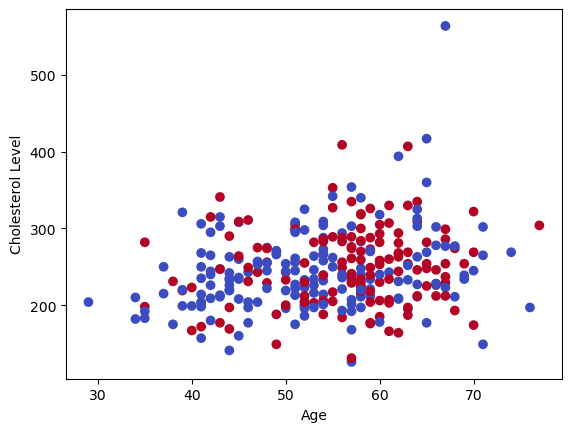

In [96]:
# creating a new column 'AHD_num' with 0 for 'No' and 1 for 'Yes'
heart_disease['AHD_num'] = heart_disease['AHD'].map({'No': 0, 'Yes': 1})

# creating a scatter plot of age and cholesterol, with color indicating whether the person has heart disease or not
plt.scatter(heart_disease.Age, heart_disease.Chol, c=heart_disease.AHD_num, cmap='coolwarm')

# add axis labels
plt.xlabel("Age")
plt.ylabel("Cholesterol Level")





Text(42.16822145061727, 0.5, 'Cholesterol Level')

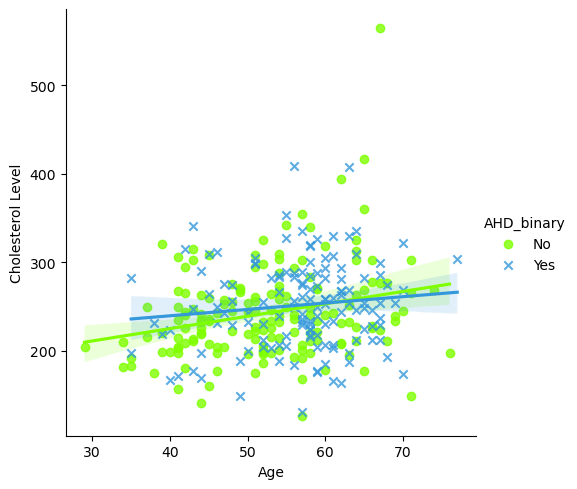

In [97]:
# creating a new column 'AHD_binary' with 'No' or 'Yes' values
heart_disease['AHD_binary'] = heart_disease['AHD'].map({'No': 'No', 'Yes': 'Yes'})

# creating a scatter plot with regression lines
sns.lmplot(x='Age', y='Chol', data=heart_disease, hue='AHD_binary', 
           markers=['o', 'x'], palette=['#7FFF00', '#3498db'])

# adding axis labels
plt.xlabel("Age")
plt.ylabel("Cholesterol Level")


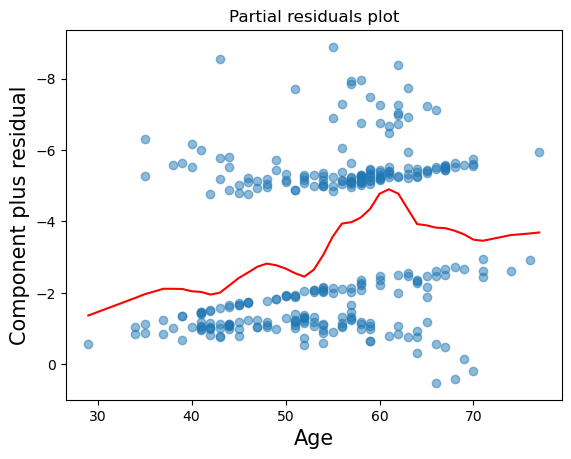

In [98]:
#Plotting the heart disease rate.
from statsmodels.graphics.regressionplots import add_lowess
fig = result.plot_partial_residuals("Age")
ax = fig.get_axes()[0]
# Invert the plot by setting the y-axis limits in reverse order
ax.set_ylim(ax.get_ylim()[::-1])
ax.lines[0].set_alpha(0.5)
m = add_lowess(ax)





Text(0.5, 1.0, 'Heart Disease Rate by Age Group')

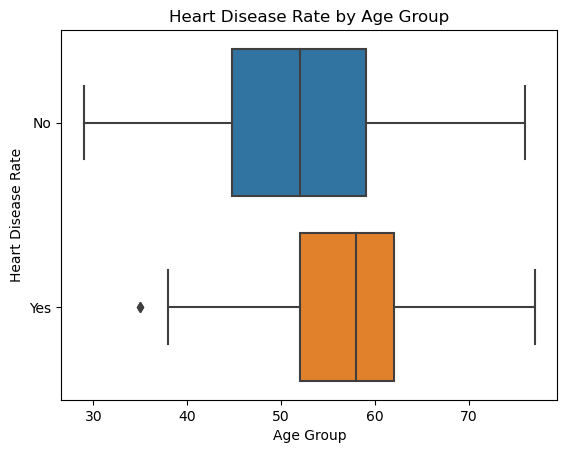

In [99]:
# creating a box plot of heart disease rate by age group
sns.boxplot(x='Age', y='AHD', data=heart_disease)
# adding axis labels and title
plt.xlabel("Age Group")
plt.ylabel("Heart Disease Rate")
plt.title("Heart Disease Rate by Age Group")



Text(0.5, 1.0, 'Heart Disease Rate by Age Group')

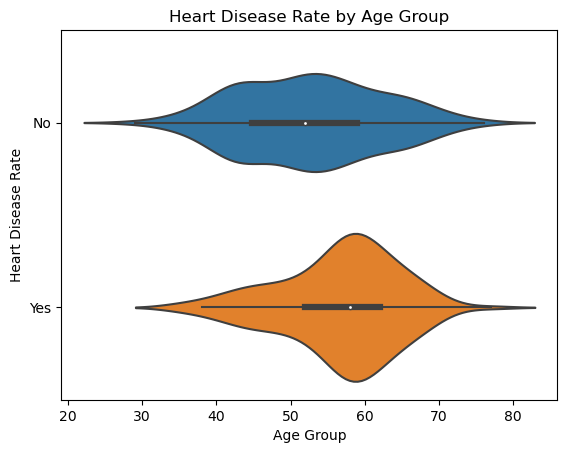

In [100]:
# creating a violin plot of heart disease rate by age group
sns.violinplot(x='Age', y='AHD', data=heart_disease)

# adding axis labels and title
plt.xlabel("Age Group")
plt.ylabel("Heart Disease Rate")
plt.title("Heart Disease Rate by Age Group")


In [101]:
#Predicting whether a person has heart disease or not using the results from the model.

heart_disease['ChestPain'] = heart_disease.ChestPain.replace({"typical":1, "asymptomatic":2, 'nonanginal':3, 'nontypical':4, })
heart_disease['Thal'] = heart_disease.Thal.replace({'fixed':1, 'normal':2, 'reversable':3})
heart_disease[['Age', 'Sex1', 'Chol', 'RestBP', 'Fbs', 'RestECG', 'Slope', 'Oldpeak', 'Ca', 'ExAng', 'ChestPain', 'Thal']].corr()


,Age,Chol,RestBP,Fbs,RestECG,Slope,Oldpeak,Ca,ExAng,ChestPain,Thal
Age,1.000000,0.208950,0.284946,0.118530,0.148868,0.161770,0.203805,0.362605,0.091661,-0.173124,0.061823
Chol,0.208950,1.000000,0.130120,0.009841,0.171043,-0.004062,0.046564,0.119000,0.061310,-0.015387,0.080874
RestBP,0.284946,0.130120,1.000000,0.175340,0.146560,0.117382,0.189171,0.098773,0.064762,-0.145149,0.057602
Fbs,0.118530,0.009841,0.175340,1.000000,0.069564,0.059894,0.005747,0.145478,0.025665,-0.023976,-0.007605
RestECG,0.148868,0.171043,0.146560,0.069564,1.000000,0.133946,0.114133,0.128343,0.084867,-0.157005,-0.011543
Slope,0.161770,-0.004062,0.117382,0.059894,0.133946,1.000000,0.577537,0.110119,0.257748,-0.250500,0.106051
Oldpeak,0.203805,0.046564,0.189171,0.005747,0.114133,0.577537,1.000000,0.295832,0.288223,-0.334661,0.208998
Ca,0.362605,0.119000,0.098773,0.145478,0.128343,0.110119,0.295832,1.000000,0.145570,-0.187667,0.149768
ExAng,0.091661,0.061310,0.064762,0.025665,0.084867,0.257748,0.288223,0.145570,1.000000,-0.314993,0.228084
ChestPain,-0.173124,-0.015387,-0.145149,-0.023976,-0.157005,-0.250500,-0.334661,-0.187667,-0.314993,1.000000,-0.168103


In [102]:
#Using all the variables for better prediction of the disease.

#Fitting a Generalized Linear Model(GLM) to a dataset 'heart_disease' with the response variable,
#'AHD' and a predictor variable 'Age' , 'Sex1' , 'Chole' and remaining column_names.
#Specifying that the dependent variable ('AHD') is regressed on two independent variables ('Age' , 'Sex1' , 'Chole' and remaining column names).
model = sm.GLM.from_formula("AHD ~ Age + Sex1 + Chol + RestBP+ Fbs + RestECG + Slope + Oldpeak + Ca + ExAng + ChestPain + Thal", family = sm.families.Binomial(), data=heart_disease)

#Fitting GLM to the data.
result = model.fit()
#Estimating the coefficients of predector variables, the standard errors, the p-values, and the goodness-of-fit statistics 
#such as the deviance and the Akaike Information Criterion (AIC).

result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                    
===================================================================================
Dep. Variable:     ['AHD[No]', 'AHD[Yes]']   No. Observations:                  297
Model:                                 GLM   Df Residuals:                      284
Model Family:                     Binomial   Df Model:                           12
Link Function:                       Logit   Scale:                          1.0000
Method:                               IRLS   Log-Likelihood:                -113.49
Date:                     Sat, 29 Apr 2023   Deviance:                       226.99
Time:                             23:04:03   Pearson chi2:                     287.
No. Iterations:                          6   Pseudo R-squ. (CS):             0.4599
Covariance Type:                 nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        9.0184      2.167      4.162      0.000       4.771      13.266
Sex1[T.Male]    -1.3765      0.426     -3.230      0.001      -2.212      -0.541
Age             -0.0052      0.021     -0.245      0.807      -0.047       0.037
Chol            -0.0041      0.004     -1.160      0.246      -0.011       0.003
RestBP          -0.0165      0.010     -1.621      0.105      -0.036       0.003
Fbs              1.0297      0.507      2.031      0.042       0.036       2.024
RestECG         -0.2011      0.173     -1.164      0.244      -0.540       0.138
Slope           -0.7875      0.336     -2.343      0.019      -1.446      -0.129
Oldpeak         -0.2789      0.205     -1.361      0.174      -0.681       0.123
Ca              -1.3120      0.247     -5.301      0.000      -1.797      -0.827
ExAng           -1.4776      0.372     -3.976      0.000      -2.206      -0.749
ChestPain        0.2524      0.205      1.234      0.217      -0.149       0.653
Thal            -0.9276      0.282     -3.285      0.001      -1.481      -0.374
================================================================================
"""

In [103]:
#predicting the output
pred = heart_disease[['Age', 'Sex1', 'Chol', 'RestBP', 'Fbs', 'RestECG', 'Slope', 'Oldpeak', 'Ca', 'ExAng', 'ChestPain', 'Thal']]
predicted_output = result.predict(pred)
predicted_output

1      0.714797
2      0.003425
3      0.008986
4      0.462060
5      0.967750
         ...   
299    0.519043
300    0.093486
301    0.090071
302    0.814391
303         NaN
Length: 303, dtype: float64

In [104]:

# for i in range( len(predicted_output)):
# #     predicted_output = predicted_output.replace()
#     if predicted_output[i] >= 0.5:
#         predicted_output = predicted_output.replace(predicted_output[i], 1)
#     else:
#         predicted_output = predicted_output.replace(predicted_output[i], 0)
updated_predictions = []
for prediction in predicted_output:
    if prediction >= 0.5:
        updated_predictions.append('No')
    else:
        updated_predictions.append('Yes')

# Convert the updated_predictions list to a pandas Series object
updated_predictions = pd.Series(updated_predictions)
updated_predictions


0       No
1      Yes
2      Yes
3      Yes
4       No
      ... 
298     No
299    Yes
300    Yes
301     No
302    Yes
Length: 303, dtype: object

In [105]:
accuracy = 0
for i in range( len(updated_predictions)):
    if heart_disease['AHD'][i+1] == updated_predictions[i]:
        accuracy += 1
acc = accuracy/len(heart_disease)
print("Accuracy of the predicted output is : ",acc )
print(f"i.e., Accuracy = {acc*100} %")


Accuracy of the predicted output is :  0.8052805280528053
i.e., Accuracy = 80.52805280528052 %
